<a href="https://colab.research.google.com/github/matthias-k/computational_physics_2024/blob/master/01_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
# we are going to classify a popular breast cancer dataset
data, target = datasets.load_breast_cancer(return_X_y=True)

In [4]:
# data is a matrix of shape (569, 30)
# the first number refers to the number of cases or samples while the second
# number refers to the number of features from which we try to predict
# breast cancer
# 
# please see the documentation @ https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
# for more details
data.shape

(569, 30)

In [5]:
# target is a binary vector of size (569,) in which each entry is the label of
# each case, either malignant (0) or benign (1).
target[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [6]:
# for simplicity we cut the number of features from 30 to just two features
data = data[:, :2]

In [7]:
# Excercise 1.1
# Try to find a linear classifier by hand that can classify the dataset 
# as good as possible. Let the classification rule be w1 * f1 + w2 * f2 + w3 > 0.5
# where w1, w2 and w3 are the weights to be learnt and f1, f2 are the features.
# What accuracy can you reach?

In [8]:
def classifier_score(data, w):
    """
    given data=(569, 2) and weights=(3) returns (569) array of classifier scores
    """
    return w[0] * data[:, 0] + w[1] * data[:, 1] + w[2]


def accuracy(scores, targets):

    return np.mean((scores > 0.5) == targets)

In [9]:
# Execise 1.1a (optional but helpful)
# create a 2d scatter plot with all data points and visualize the model
# predictions, e.g. by coloring them with matplotlib's `fill` method

# Excercise 1.2
# Learn the optimal parameters automatically using gradient descent. For the
# loss function use a simple squared loss (t - tp)**2 where t is the target
# label (either 0 or 1) and tp = w1 * f1 + w2 * f2 + w3 is the predicted label.
# What accuracy can you reach? Why is this loss function problematic? Do you
# have ideas for a a better alternative?

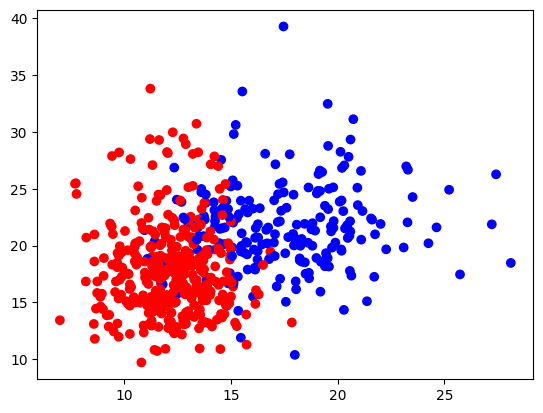

In [10]:
# 1.1a

def plot_data(datapoints, targets):
    x = datapoints[:, 0].T
    y = datapoints[:, 1].T
    colors = ["r" if target==1 else "b" for target in targets]
    plt.scatter(x, y, c=colors)

plot_data(data, target)




0.8910369068541301


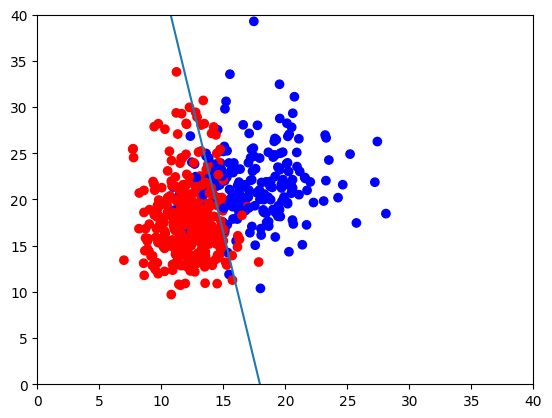

In [ ]:
# 1.1: by hand

w_opt = np.array([-10,-1.8,180]) # [w1, w2, w3]

x = np.linspace(5,20,1000)

def linfunc(x, w_opt):
    return 1/w_opt[1] * (0.5 - w_opt[0] * x - w_opt[2]) # f2 = (0.5 - w1 * f1 - w3)/w2

plt.plot(x, linfunc(x, w_opt))
plot_data(data, target)
plt.xlim(0,40)
plt.ylim(0,40)
print(accuracy(classifier_score(data, w_opt), target))

Die beste accuracy, die "von Hand" erreicht werden konnte, liegt bei 89.1%.

In [36]:
def mean_squared_error(scores, targets):
    pass

In [ ]:
# Excercise 1.2a (optional)
# use all 30 dimensions instead of only 2. Can you get better accuracy?